In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
student_data = pd.read_csv("student-mat.csv", sep=';')

student_data['pass'] = np.where(student_data['G3'] >= 10, 1, 0)

student_data = student_data.drop(['G1', 'G2', 'G3'], axis=1)

student_data_encoded = pd.get_dummies(student_data, drop_first=True)

X = student_data_encoded.drop('pass', axis=1)
y = student_data_encoded['pass']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Preprocessing Complete. Shape of X:", X.shape)


Data Preprocessing Complete. Shape of X: (395, 39)


 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53        27
           1       0.75      0.88      0.81        52

    accuracy                           0.73        79
   macro avg       0.71      0.66      0.67        79
weighted avg       0.72      0.73      0.72        79



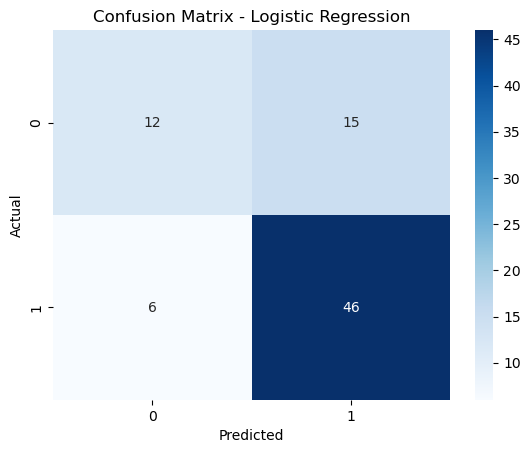

In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predict on test data
y_pred_log = log_model.predict(X_test)

print(" Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log))

conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [6]:

import numpy as np

X_train_np = X_train.to_numpy(dtype=np.float64, copy=True)
X_test_np = X_test.to_numpy(dtype=np.float64, copy=True)
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

print("Conversion successful!")


Conversion successful!


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


🔍 k-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.30      0.39        27
           1       0.71      0.88      0.79        52

    accuracy                           0.68        79
   macro avg       0.64      0.59      0.59        79
weighted avg       0.66      0.68      0.65        79



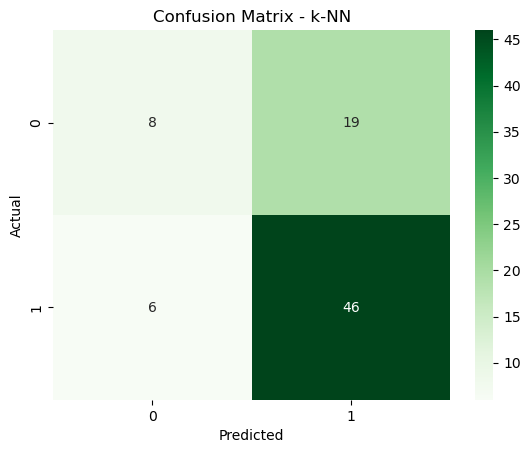

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_np, y_train_np)

y_pred_knn = knn_model.predict(X_test_np)

print(" k-Nearest Neighbors - Classification Report:")
print(classification_report(y_test_np, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test_np, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - k-NN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🌳 Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.33      0.39        27
           1       0.70      0.81      0.75        52

    accuracy                           0.65        79
   macro avg       0.59      0.57      0.57        79
weighted avg       0.62      0.65      0.63        79



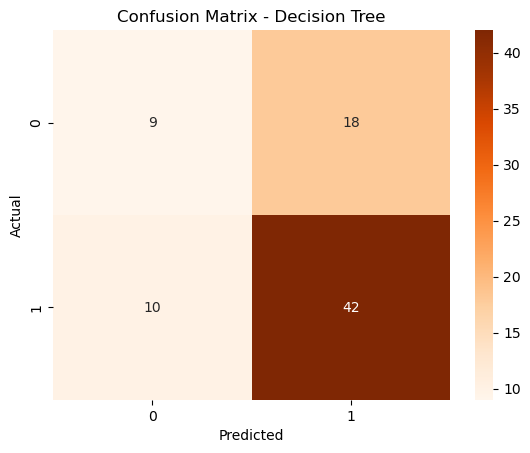

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_np, y_train_np)

y_pred_tree = tree_model.predict(X_test_np)

print(" Decision Tree - Classification Report:")
print(classification_report(y_test_np, y_pred_tree))

conf_matrix_tree = confusion_matrix(y_test_np, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": y_pred_log,
    "k-NN": y_pred_knn,
    "Decision Tree": y_pred_tree
}

results = []

for name, y_pred in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test_np, y_pred),
        "Precision": precision_score(y_test_np, y_pred),
        "Recall": recall_score(y_test_np, y_pred),
        "F1 Score": f1_score(y_test_np, y_pred)
    })

import pandas as pd

results_df = pd.DataFrame(results)
print(" Model Performance Comparison:")
print(results_df)


📊 Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.734177   0.754098  0.884615  0.814159
1                 k-NN  0.683544   0.707692  0.884615  0.786325
2        Decision Tree  0.645570   0.700000  0.807692  0.750000
